# WeatherPy
----

### Analysis
* As it is spring in the Northern Hemisphere, the distribution of temperatures is approaching balanced over the Equator.
* The distribution of randomly selected cities also demonstrates that the majority of people, and therefore cities, are located in the Northern Hemisphere.
* While there does not appear to be a correlation between latitude, wind and clouds; there does appear to appear to be marginally more low humidity cities in the Northern Hemisphere.
---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data = "output/cities_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + api_key + "&units=imperial" + "&q="
cnt = 1
fieldnames = ['City','Cloudiness','Country','Date','Humidity','Lat','Lng','High Temp','Wind Speed']


print("""
    Processing Records, please wait a while.
    ----------------------------------------
    """)


for city in cities:
    weather_response = requests.get(query_url + city)
    weather_json = weather_response.json()
    
    try:
        print(f"Processing Record {cnt} of {len(cities)} | {weather_json['name']}")
        cnt += 1
        cdata_out = {
            'City':weather_json['name'],
            'Cloudiness':weather_json['clouds']['all'],
            'Country':weather_json['sys']['country'],
            'Date':weather_json['dt'],
            'Humidity':weather_json['main']['humidity'],
            'Lat':weather_json['coord']['lat'],
            'Lng':weather_json['coord']['lon'],
            'High Temp':weather_json['main']['temp_max'],
            'Wind Speed':weather_json['wind']['speed']
        }
        
        if cnt == 2:
            with open(output_data, 'w') as csvfile:
                writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
                writer.writeheader()
                writer.writerow(cdata_out)
              
        else:
            with open(output_data, 'a') as csvfile:
                writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
                writer.writerow(cdata_out)             
              
              
    except KeyError:
        print("City not found. Skipping...")
        cnt += 1





    Processing Records, please wait a while.
    ----------------------------------------
    
Processing Record 1 of 605 | Aginskoye
Processing Record 2 of 605 | Hobart
Processing Record 3 of 605 | Bethel
Processing Record 4 of 605 | Kapaa
City not found. Skipping...
Processing Record 6 of 605 | Cabo San Lucas
Processing Record 7 of 605 | Bluff
Processing Record 8 of 605 | Cape Town
Processing Record 9 of 605 | Popova
Processing Record 10 of 605 | Alice Springs
Processing Record 11 of 605 | Jamestown
Processing Record 12 of 605 | Carnarvon
Processing Record 13 of 605 | Chokurdakh
Processing Record 14 of 605 | Honningsvag
City not found. Skipping...
Processing Record 16 of 605 | Nouakchott
Processing Record 17 of 605 | Kodiak
Processing Record 18 of 605 | Ushuaia
Processing Record 19 of 605 | Busselton
Processing Record 20 of 605 | Fort-Shevchenko
Processing Record 21 of 605 | Vila Franca do Campo
Processing Record 22 of 605 | Rikitea
Processing Record 23 of 605 | Mataura
City not fou

Processing Record 211 of 605 | Ruteng
Processing Record 212 of 605 | Hohhot
Processing Record 213 of 605 | Skoghall
Processing Record 214 of 605 | Mamallapuram
Processing Record 215 of 605 | La Ligua
Processing Record 216 of 605 | Guilin
City not found. Skipping...
Processing Record 218 of 605 | Buriti Alegre
Processing Record 219 of 605 | Houma
Processing Record 220 of 605 | Saldanha
Processing Record 221 of 605 | Pine Bluff
Processing Record 222 of 605 | Ust-Tsilma
Processing Record 223 of 605 | Taoudenni
Processing Record 224 of 605 | New Norfolk
Processing Record 225 of 605 | San Patricio
City not found. Skipping...
Processing Record 227 of 605 | Mahanoro
Processing Record 228 of 605 | Ust-Kuyga
Processing Record 229 of 605 | Longyearbyen
Processing Record 230 of 605 | Malpe
Processing Record 231 of 605 | Qitaihe
Processing Record 232 of 605 | Kamaishi
Processing Record 233 of 605 | Mpulungu
City not found. Skipping...
Processing Record 235 of 605 | Marawi
City not found. Skipping.

Processing Record 422 of 605 | Wick
Processing Record 423 of 605 | Alice
Processing Record 424 of 605 | Tucurui
Processing Record 425 of 605 | Peterhead
City not found. Skipping...
Processing Record 427 of 605 | San Martin
City not found. Skipping...
Processing Record 429 of 605 | Agadez
City not found. Skipping...
Processing Record 431 of 605 | Grenville
Processing Record 432 of 605 | Itoman
Processing Record 433 of 605 | Pringsewu
Processing Record 434 of 605 | Leticia
City not found. Skipping...
Processing Record 436 of 605 | Stromness
Processing Record 437 of 605 | Shenjiamen
City not found. Skipping...
Processing Record 439 of 605 | Saint-Raymond
Processing Record 440 of 605 | Mmathubudukwane
Processing Record 441 of 605 | Dingle
Processing Record 442 of 605 | Mugla
Processing Record 443 of 605 | Zhangye
Processing Record 444 of 605 | Aklavik
Processing Record 445 of 605 | Te Anau
Processing Record 446 of 605 | Palm Coast
Processing Record 447 of 605 | Boissevain
Processing Record

In [4]:
weather_df = pd.read_csv(output_data, header=0)

weather_df = weather_df.dropna()

weather_df.count()

City          536
Cloudiness    536
Country       536
Date          536
Humidity      536
Lat           536
Lng           536
High Temp     536
Wind Speed    536
dtype: int64

In [5]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,High Temp,Wind Speed
0,Aginskoye,0,RU,1555808842,23,51.11,114.54,33.68,1.41
1,Hobart,0,AU,1555808715,56,-42.88,147.33,75.00,10.29
2,Bethel,90,US,1555806600,92,60.79,-161.76,30.20,8.72
3,Kapaa,20,US,1555808615,61,22.08,-159.32,80.60,12.75
4,Cabo San Lucas,20,MX,1555808562,23,22.89,-109.91,87.80,11.41


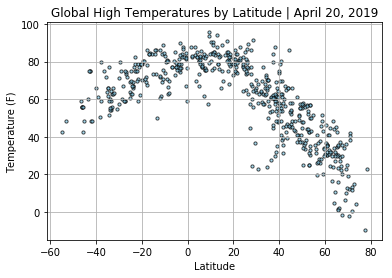

<Figure size 432x288 with 0 Axes>

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.scatter(weather_df['Lat'], weather_df['High Temp'], s=10, c='skyblue', edgecolor='k', marker="o", alpha=0.7)

ax1.grid(True)

plt.ylabel('Temperature (F)')
plt.xlabel('Latitude')
ax1.set_title('Global High Temperatures by Latitude | April 20, 2019')

plt.show()
plt.savefig("output/temp_v_lat.png")

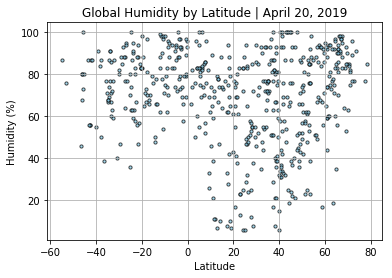

<Figure size 432x288 with 0 Axes>

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.scatter(weather_df['Lat'], weather_df['Humidity'], s=10, c='skyblue', edgecolor='k', marker="o", alpha=0.7)

ax1.grid(True)

plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
ax1.set_title('Global Humidity by Latitude | April 20, 2019')

plt.show()
plt.savefig("output/humidity_v_lat.png")

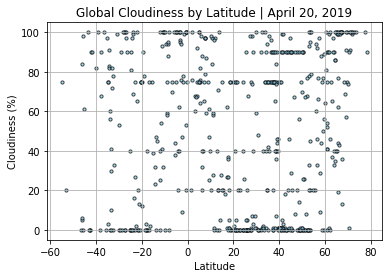

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.scatter(weather_df['Lat'], weather_df['Cloudiness'], s=10, c='skyblue', edgecolor='k', marker="o", alpha=0.7)

ax1.grid(True)

plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
ax1.set_title('Global Cloudiness by Latitude | April 20, 2019')

plt.show
plt.savefig("output/cloudiness_v_lat.png")

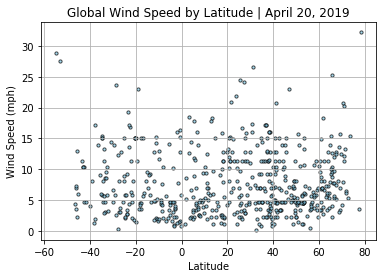

<Figure size 432x288 with 0 Axes>

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.scatter(weather_df['Lat'], weather_df['Wind Speed'], s=10, c='skyblue', edgecolor='k', marker="o", alpha=0.7)

ax1.grid(True)

plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
ax1.set_title('Global Wind Speed by Latitude | April 20, 2019')

plt.show()
plt.savefig("output/wind_v_lat.png")